# Analyzing Stock Market Data to Build a Portfolio

## Project Goal

### Analyze share price data from various listings to answer the following questions:

1. What kind of Growth % do we expect from the various listings? <br>
2. How do the Growth % of the different listings correlate to each other? <br>
3. What is the estimated listing share price at a future date (prediction)? <br>
4. What kind of volatility do the listings have? <br>
5. How can we use our analysis to form a balanced investment portfolio? <br>

### Overall Methodology:

1. Import and organize data for the various listings <br>
2. Make observations about the data <br>
3. Use these observations to answer the questions <br>

## References

Share price information obtained from: [Yahoo Finance](https://finance.yahoo.com/) <br>
Yahoo Finance library: [yfinance](https://pypi.org/project/yfinance/) <br>
Robinhood Stocks library: [robin_stocks](http://www.robin-stocks.com/en/latest/functions.html) <br>

## Inputs

### Below are the inputs to perform the analysis

In [1]:
#s_list='AM AAPL AMZN FB NVDA NFLX MSFT QCOM PYPL GOOGL TWTR TSLA ZNGA JCI JMIA SSL INTC AMD TSM HRB KO ALTR SQ SPCE INO NIO WKHS SOLO MVIS MRNA JNJ CLX PFE RBLX FCEL CARR EH XPEV HON RTX V MA OTIS IDEX GEVO NOK BB SLV PAAS HGSH AG ACB DG DUK SOXX VEGI IEHS MCD IYJ VICE XHS XHB PK IAK SLVP SKYY MSOS ARKG ARKK ARKQ VXRT SNDL PLTR POTX M WMT KSS NFLX DKS UBER UONE GNUS TOPS DIS ABNB SBUX LYFT GSAT SENS CPRX NBEV PPBT COST SPY NDAQ INDF VWO GOVT BND VT IEF VTI VOO DIA VGK XLK IAU QQQ GLD GLDG H T NCLH RKT F GM AAL UAL BA BAC JPM GE SNAP BRK-B QSR XLE XES AMC GRPN GME TTM H MRO OSK TLRY KOSS'  # List of "listings" to be analyzed
s_list='BTC-USD ETH DOGE-USD'
total_investment=5001  # Total investment value in USD
sample_interval ='1d'  # Time interval to fetch data at 
#start='11/27/2020'  # Start date of interest
#start='09/26/2020'  # Start date of interest
start='3w'
end='03/11/2021'  # End date of interest
datetime_query=['05/28/2021'] # Datetime query values (for prediction)
pricetype='Close' # Open, Close, Low, High

## Import Libraries

In [2]:
# Python Version
import sys
sys.version

'3.6.12 | packaged by conda-forge | (default, Dec  9 2020, 00:36:02) \n[GCC 9.3.0]'

In [3]:
#Update python standard libraries install
!pip install --upgrade pip

# library to for array handling
import numpy as np 

# library for dataframes
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Linear Model
import sklearn as sk

# List Functions module
!pip install listfun
from listfun import Listoper as lst

# Math Module
import math

# Matplotlib and associated plotting modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# Machine-Learning and analysis modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

! pip install expsolver;
from expsolver import Solver as solve

# Module to handle XML and HTML 
! pip install lxml;

#Finance information import (Link in "Yahoo Finance" Markdown Cell in the "References" Section)
!pip install yfinance;
import yfinance as yf;

#Robinhood stocks functions
!pip install robin_stocks;
import robin_stocks as r;

print('Libraries imported.')

     |████████████████████████████████| 1.5MB 6.5MB/s eta 0:00:01
  Found existing installation: pip 19.1.1
    Uninstalling pip-19.1.1:
      Successfully uninstalled pip-19.1.1
  Created wheel for listfun: filename=listfun-1.2-py3-none-any.whl size=2425 sha256=e7540c7cadd2fcd7d874d1d5cb4f96a917d0de3705b273839c90db34b0670556
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/f5/ff/23/223a4857970df927f1a8afdcfc470ee6572682fbffd44e9839
Successfully built listfun
  Created wheel for expsolver: filename=expsolver-0.5-py3-none-any.whl size=3250 sha256=3215fd71eb8013da380c6cb0f2a34651acfcd8c9699b82c32bfcfbcddc7b6d9d
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/10/06/27/1ac19133655334cc4412366975676bda2c4b5d92cfd112132e
Successfully built expsolver
     |████████████████████████████████| 5.5 MB 11.1 MB/s eta 0:00:01     |██████████████████████████▎     | 4.5 MB 11.1 MB/s eta 0:00:01     |██████████████████████████████▋ | 5.3 MB 11.1 MB/s eta 0:00:01
  Created wheel for yf

## Import Data into DataFrame

In [4]:
end=pd.to_datetime(end)
if len(start)<=4:
    start=end-pd.to_timedelta(start)
else:
    start=pd.to_datetime(start)
print('Start: {}, End: {}'.format(start,end))

Start: 2021-02-18 00:00:00, End: 2021-03-11 00:00:00


### Create basic dataframe "df_info" containing all the available stocks information

In [5]:
# Create list of stock names as specified by the User
s_list=s_list.split(' ')
s_list=list(set(s_list))

In [6]:
# Initialize Basic Dataframe as empty
df_info=pd.DataFrame() 

# Add Shares information for List of stock names
for item in s_list:
    data=yf.Ticker(item)
    df_data=data.history(period=sample_interval,start=start ,end=end )
    df_data=df_data.reset_index()
    df_data['Name']=pd.DataFrame([item for i in range(0,len(df_data))])
    df_info=pd.concat([df_info,df_data])
    

# Display basic information
df_info.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Name
0,2021-02-18,52140.972656,52474.105469,51015.765625,51679.796875,52054723579,0,0,BTC-USD
1,2021-02-19,51675.980469,56113.652344,50937.277344,55888.132812,63495496918,0,0,BTC-USD
2,2021-02-20,55887.335938,57505.226562,54626.558594,56099.519531,68145460026,0,0,BTC-USD
3,2021-02-21,56068.566406,58330.570312,55672.609375,57539.945312,51897585191,0,0,BTC-USD
4,2021-02-22,57532.738281,57533.390625,48967.566406,54207.320312,92052420332,0,0,BTC-USD


In [7]:
# Size of Data:
print('Size of the full dataset is: {} by {}'.format(df_info.shape[0],df_info.shape[1]))

Size of the full dataset is: 59 by 9


## Exploratory Pre-Processing Analysis

### Create Dataframe (df) of Relevant share Price vs. date, which will be the data looked at in this analysis  

In [8]:
# Create new Dataframe of relevant Share Prices
datevalues=df_info['Date'].sort_values().drop_duplicates().tolist()
df=pd.DataFrame(index=datevalues,columns=s_list)
for item in s_list:
    df_item=df_info[df_info['Name']==item]
    for ind in df.index.tolist():
    #df[['Date',item]]=df_info.loc[df_info['Name']==item,['Date',pricetype]]
        try:
            df.loc[ind,item]=df_item.loc[df_item['Date']==ind,pricetype].values[0]
        except:
            pass
    df[item].fillna(method='bfill',inplace=True)
    df[item].fillna(method='ffill',inplace=True)

df_price=df.copy()
# Display initial few contents of the Dataset
df.tail(10)

,BTC-USD,ETH,DOGE-USD
2021-03-02,48378.988281,26.219999,0.050262
2021-03-03,50538.242188,25.959999,0.050592
2021-03-04,48561.167969,24.860001,0.050048
2021-03-05,48927.304688,25.459999,0.049609
2021-03-06,48912.382812,27.070000,0.050984
2021-03-07,51206.691406,27.070000,0.052122
2021-03-08,52246.523438,27.070000,0.061949
2021-03-09,54824.117188,26.440001,0.057998
2021-03-10,56008.550781,27.780001,0.056004
2021-03-11,56337.683594,27.780001,0.055142


### Display basic information about this dataset

In [9]:
# Display basic statistics of the opening prices
# Darker cells denote higher values
df.describe().style.background_gradient(axis=1).format("{:.2f}")

,BTC-USD,ETH,DOGE-USD
count,22.00,22.00,22.00
mean,51103.51,25.91,0.05
std,3763.49,0.98,0.00
min,45137.77,24.23,0.05
25%,48626.98,25.11,0.05
50%,50121.79,25.80,0.05
75%,54669.92,26.39,0.06
max,57539.95,27.78,0.06


### Create basic Time plot to look at pertinent information

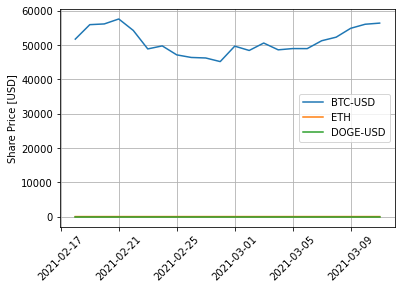

In [10]:
# Plot Open price vs. Time
ax= plt.subplot()
for item in df_price.columns:
    plt.plot(df_price[item])

plt.xticks(rotation=45)
ax.legend(df_price.columns)
plt.ylabel('Share Price [USD]')
ax.grid(True)

## What kind of Growth % do we see with the various listings?

### Normalize the opening price to determine Growth % over the period of interest

Normalize w.r.t. start price (df_start) <br> 
Normalization used: (price-start_price)/start_price*100 to obtain df_norm

In [11]:
# Normalization Function
def df_normalize(df):
    df_strt=df.iloc[0,:]
    df_norm=(df.iloc[:,:]-df_strt)/df_strt*100
    df_strt=pd.DataFrame(df_strt).transpose()
    df_strt.set_axis(['start_price'],axis=0,inplace=True)
    return [df_norm,df_strt]

# Store Normalized values in DataFrame and display results                          
[df_norm,df_start]=df_normalize(df)
df_norm.head()

,BTC-USD,ETH,DOGE-USD
2021-02-18,0.000000,0.000000,0.000000
2021-02-19,8.143097,3.177881,-7.393220
2021-02-20,8.552129,3.631866,-8.661255
2021-02-21,11.339341,3.631866,-5.980749
2021-02-22,4.890738,3.631866,-9.768055


In [12]:
# Size of Data:
print('Size of the data is: {} by {}'.format(df_norm.shape[0],df_norm.shape[1]))

Size of the data is: 22 by 3


In [13]:
# Display basic statistics of the normalized prices
# Darker cells denote higher values
df_norm.describe().loc[['count','mean','min','max'],:].style.background_gradient(axis=1).format("{:.1f}")

,BTC-USD,ETH,DOGE-USD
count,22.0,22.0,22.0
mean,-1.1,6.9,-10.9
min,-12.7,0.0,-20.4
max,11.3,14.7,4.0


### Plot trends in Normalized values

Time Plot

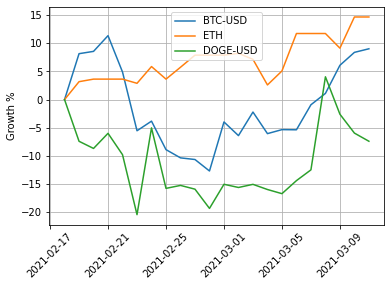

In [14]:
# Display Growth % over time
ax= plt.subplot()
for item in df_norm.columns:
    plt.plot(df_norm[item])

plt.xticks(rotation=45)
ax.legend(df.columns,loc='upper center')
plt.ylabel('Growth %')
ax.grid(True)

## How do the price gains of the listings correlate to each other?

Correlation Matrix

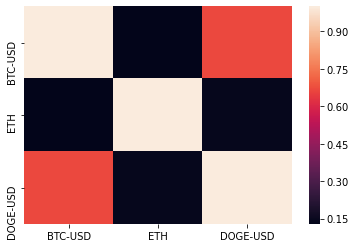

In [15]:
sns.heatmap(df_norm.corr());

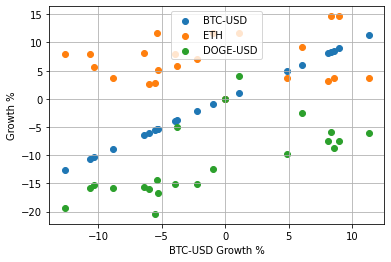

In [16]:
ax= plt.subplot()
for item in df_norm.columns:
    plt.scatter(df_norm.iloc[:,0],df_norm[item])

ax.legend(df_norm.columns,loc='upper center')
plt.xlabel('{} Growth %'.format(df_norm.columns[0]))
plt.ylabel('Growth %')
ax.grid(True)

## Calculate percent and absolute estimate and bounds of Growth 

### Create a linear regression fit for the data with thrice the standard dev. of obs.-est. to determine the boundaries

<b> Linear Regression object, score and price boundaries for each listing </b>

In [17]:
def lin_obj(df):
    df_lin=df.iloc[0:1,:]
    df_lin.reindex(['fit_obj','score','bound'])
    df_lin.drop(index=df_lin.index[0],inplace=True)
    for item in df_lin.columns:
        # ... (intercept and coeff.) of the fits
        X=np.array(pd.to_numeric(df.index)).reshape(-1, 1)
        Y=(df[item].values).reshape(-1, 1)
        lin_list_coeff=[]
        lin_list_intercept=[]
        for i in range(0,1):
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0)
            lin_obj=LinearRegression()
            lin_obj.fit(X_train,y_train)
            lin_list_coeff.append(lin_obj.coef_)
            lin_list_intercept.append(lin_obj.intercept_)
        linobj = LinearRegression()
        linobj.coef_=np.array(np.array(lin_list_coeff).mean()).reshape(-1)
        linobj.intercept_=np.array(np.array(lin_list_intercept).mean()).reshape(-1)
        score=linobj.score(X,Y)
        df_lin.loc['fit_obj',item]=linobj
        df_lin.loc['score',item]=score

    # Calculate price bounds
    df_est=pd.DataFrame()
    df_est.rename_axis(index='Datetime')
    df_est['Datetime']=df.index
    df_est.set_index('Datetime',inplace=True)
    for item in df.columns:
        fit_obj=df_lin.loc['fit_obj',item]
        for datetime in df_est.index:
            est=fit_obj.predict(np.array(datetime.value).reshape(-1,1))
            df_est.loc[datetime,'{}'.format(item)]=est
    for item in df.columns:
        df_diff=df[item]-df_est[item]
        bounds=3*df_diff.std()
        df_lin.loc['bound',item]=bounds
        
    return df_lin

Convert rise and fall from % to price (using price change= percent change/100*start price) and display.<br>

In [18]:
# Call lin_obj(...) to create the price estimation object dataframe
df_norm_price_est_obj=lin_obj(df_norm)
df_price_bounds_dict={}
for item in df_norm.columns:
    df_price_bounds_dict[item]=df_norm_price_est_obj.loc['bound',item]*df_start.loc['start_price',item]/100
df_price_bounds=pd.DataFrame(df_price_bounds_dict,index=['price_bounds'])
df_norm_price_est_obj=df_norm_price_est_obj.append(df_price_bounds)
df_norm_price_est_obj

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,BTC-USD,ETH,DOGE-USD
fit_obj,"LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr...","LinearRegression(copy_X=True, fit_intercept=Tr..."
score,1.29509e-05,0.719565,0.00104352
bound,21.8468,6.43,19.4387
price_bounds,11290.4,1.55799,0.011574


### Estimate the price and bounds vs. date using the fit object

In [19]:
# Function to estimate the price given the price dataframe, fit objects and datetime query
def price_est(df,df_norm_price_est_obj,df_strt,datetime_query):
    df_price_est=pd.DataFrame()
    df_price_est.rename_axis(index='Datetime')
    df_price_est['Datetime']=pd.to_datetime(datetime_query)
    df_price_est.set_index('Datetime',inplace=True)
    for item in df.columns:
        fit_obj=df_norm_price_est_obj.loc['fit_obj',item]
        for datetime in df_price_est.index:
            norm_price_est=fit_obj.predict(np.array(datetime.value).reshape(-1,1))
            price_est=norm_price_est*df_strt.loc['start_price',item]/100+df_strt.loc['start_price',item]
            df_price_est.loc[datetime,'{}'.format(item)]=price_est
            df_price_est.loc[datetime,'{}_low'.format(item)]=price_est-(df_norm_price_est_obj.loc['price_bounds',item])
            df_price_est.loc[datetime,'{}_high'.format(item)]=price_est+(df_norm_price_est_obj.loc['price_bounds',item])
            df_price_est.loc[datetime,'{}_lo_mid'.format(item)]=df_price_est.loc[datetime,['{}'.format(item),
                                                                                         '{}_low'.format(item)]].mean()
            df_price_est.loc[datetime,'{}_hi_mid'.format(item)]=df_price_est.loc[datetime,['{}'.format(item),
                                                                                         '{}_high'.format(item)]].mean()
            df_price_est.loc[datetime,'{}_lo_ratio'.format(item)]=df_price_est.loc[datetime,'{}_low'.format(item)]/price_est
    df_price_est.reindex(df_price_est.index.date)
    df_price_est=df_price_est
    return df_price_est


## What is the predicted share price?

In [20]:
df_price_est=price_est(df_price,df_norm_price_est_obj,df_start,datetime_query)
df_price_est.style.background_gradient(axis=1).format("{:.1f}")

,BTC-USD,BTC-USD_low,BTC-USD_high,BTC-USD_lo_mid,BTC-USD_hi_mid,BTC-USD_lo_ratio,ETH,ETH_low,ETH_high,ETH_lo_mid,ETH_hi_mid,ETH_lo_ratio,DOGE-USD,DOGE-USD_low,DOGE-USD_high,DOGE-USD_lo_mid,DOGE-USD_hi_mid,DOGE-USD_lo_ratio
Datetime,,,,,,,,,,,,,,,,,,
2021-05-28 00:00:00,50918.9,39628.5,62209.3,45273.7,56564.1,0.8,37.2,35.7,38.8,36.5,38.0,1.0,0.1,0.0,0.1,0.0,0.1,0.8


## What kind of volatility do the listings have?

## How do we generate our investment portfolio?

### Estimate the price history along with the bounds and plot the history and estimates for each listing

In [21]:
# Datetime history query values
datetime_query_start_end=pd.date_range(start=start,end=end)

In [22]:
# Generate and display estimates (listing, listing_low, listing_high)
df_price_est_start_end=price_est(df_price,df_norm_price_est_obj,df_start,datetime_query_start_end)
df_price_est_start_end.head().style.format("{:.0f}")

,BTC-USD,BTC-USD_low,BTC-USD_high,BTC-USD_lo_mid,BTC-USD_hi_mid,BTC-USD_lo_ratio,ETH,ETH_low,ETH_high,ETH_lo_mid,ETH_hi_mid,ETH_lo_ratio,DOGE-USD,DOGE-USD_low,DOGE-USD_high,DOGE-USD_lo_mid,DOGE-USD_hi_mid,DOGE-USD_lo_ratio
Datetime,,,,,,,,,,,,,,,,,,
2021-02-18 00:00:00,51125,39835,62416,45480,56771,1,25,23,26,24,25,1,0,0,0,0,0,1
2021-02-19 00:00:00,51123,39833,62414,45478,56769,1,25,23,26,24,25,1,0,0,0,0,0,1
2021-02-20 00:00:00,51121,39831,62412,45476,56766,1,25,23,26,24,26,1,0,0,0,0,0,1
2021-02-21 00:00:00,51119,39829,62410,45474,56764,1,25,23,27,24,26,1,0,0,0,0,0,1
2021-02-22 00:00:00,51117,39827,62407,45472,56762,1,25,24,27,24,26,1,0,0,0,0,0,1


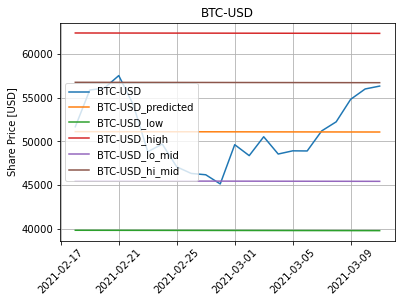

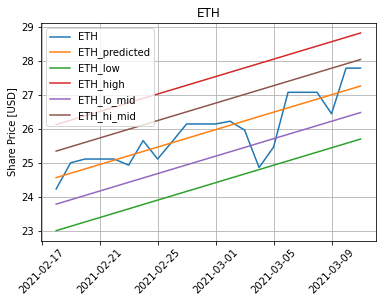

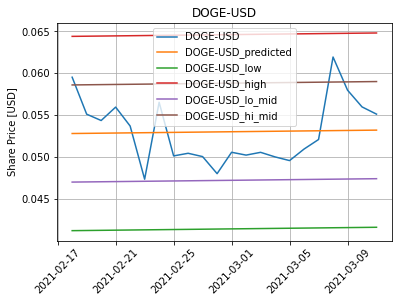

In [23]:
# Plot Open price vs. Time
num_plot=len(df.columns)
i=1
for item in df.columns:
    plt.figure()
    plt.plot(df_price[item])
    plt.plot(df_price_est_start_end[[item,item+'_low',item+'_high',item+'_lo_mid',item+'_hi_mid']])
    plt.legend([item,item+'_predicted',item+'_low',item+'_high',item+'_lo_mid',item+'_hi_mid'])
    plt.ylabel('Share Price [USD]')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.title(item)
    i=i+1

## Constructing the Portfolio

In order to balance the investments, we'd want to have the most benefit (reward) while minimizing volatility (risk).<br>
1. We can consider 'reward' to be the slope of the linear fit to share price (higher the slope, higher the gain).<br>
2. We can consider 'risk' to be the ratio between the price bounds and change in price over the duration of interest <br>
3. Hence we can compute a 'returns ratio' = 'reward'/'risk' for each listing; the higher this value, the more this investment is viable. <br>
4. Then we can compute the sum of the returns ratios for each listing and divide the returns ratio by the summed value, to determine the "weight" of each investment <br>
5. Finally we can multiply the "weight" by the total investment capital (total_investment) to obtain the recommended investment for each listing <br>    

### Use the Linear Regression object to construct the reward, volatility, returns ratio, weight and suggested investment values

In [24]:
# Initialize the portfolio dataframe df_portfolio and update the index suitably
df_portfolio=df_norm_price_est_obj
df_portfolio=df_portfolio.reindex(['reward','risk','returns_ratio','weight','price_bound','suggested_investment'])
df_portfolio=df_portfolio.rename_axis(index='Parameters')

# Update "reward" using the slope of the line fit (multiplied by a suitable factor for display)
for item in (df_portfolio.columns):
    df_portfolio.loc['reward',item]=(df_norm_price_est_obj.loc['fit_obj',item].coef_[0])*10**17
    
# Update the "volatility" as the percent price bound
for item in (df_portfolio.columns):
    df_portfolio.loc['risk',item]=(df_norm_price_est_obj.loc['bound',item])
                                         
# Update the returns ratio as the ratio between the "reward" and "volatility"
for item in (df_portfolio.columns):
    df_portfolio.loc['returns_ratio',item]=(df_portfolio.loc['reward',item]/
                                            df_portfolio.loc['risk',item])
    
# Remove those listings with negative returns_ratio since those imply a falling stock
df_price_est_end=price_est(df,df_norm_price_est_obj,df_start,[df.index[-1].strftime('%m/%d/%y')])
for item in df_portfolio.columns:
    item_low_str=item+'_low'
    item_hi_str=item+'_high'
    if df_portfolio.loc['returns_ratio',item]<=21:
        if df_portfolio.loc['reward',item]<=201 or df_portfolio.loc['risk',item]>71:
            df_portfolio.pop(item)
    elif df[item].iloc[-1]>=df_price_est_end[item_hi_str].to_numpy()[0] or \
    df[item].iloc[-1]<=df_price_est_end[item_low_str].to_numpy()[0]:
        df_portfolio.pop(item)
        
# Obtain the weighted average of the returns ratio for each listing
for item in (df_portfolio.columns):
    df_portfolio.loc['weight',item]=df_portfolio.loc['returns_ratio',item]/df_portfolio.loc['returns_ratio',:].sum()
    
# Update stop loss limit
for item in (df_portfolio.columns):
    df_portfolio.loc['price_bound',item]=df_norm_price_est_obj.loc['price_bounds',item]
    
# Multiply the weight of each listing by the total investment capital to obtain the recommended investment
for item in (df_portfolio.columns):
    df_portfolio.loc['suggested_investment',item]=df_portfolio.loc['weight',item]*total_investment

    
# Display the portfolio dataframe
df_portfolio.sort_values(axis=1,by='weight',ascending=False).style.background_gradient(axis=1).format("{:.2f}")

,ETH
Parameters,
reward,611.94
risk,6.43
returns_ratio,95.17
weight,1.00
price_bound,1.56
suggested_investment,5001.00


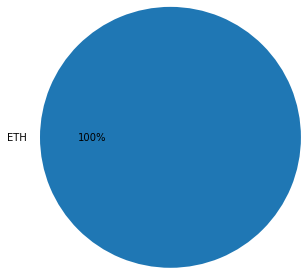

In [25]:
stock_labels=df_portfolio.columns
values=df_portfolio.loc['suggested_investment',:]
plt.pie(values, labels=stock_labels,radius=1.5, autopct='%1.0f%%');

### What kind of volatility do the listings have?

 Refer the "volatility" row, higher the value, greater the volatility

### How do we use the data to construct our portfolio?

Refer the dataframe "df_portfolio"

## Compare with previous

In [26]:
df_saved=pd.read_csv('portfolio.csv')
df_saved.set_index('Parameters',inplace=True)

In [27]:
comm_stocks=list(set(df_saved.columns.tolist()).intersection(set(df_portfolio.columns.tolist())))

Sum: weight_diff    0.0
dtype: float64, Min.: weight_diff   NaN
dtype: float64, Max.: weight_diff   NaN
dtype: float64


IndexError: index 0 is out of bounds for axis 0 with size 0

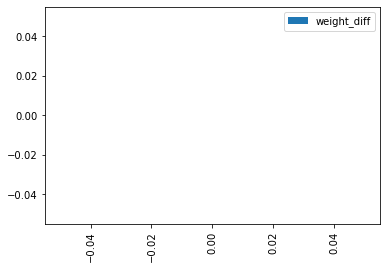

In [28]:
weight_diff={}
for i in range(len(comm_stocks)):
    ticker=comm_stocks[i]
    weight_diff[ticker]=(df_portfolio.loc['weight',
                                          ticker]-df_saved.loc['weight',ticker])/df_portfolio.loc['weight',ticker]*100
df_weight_diff=pd.DataFrame(weight_diff,index=['weight_diff'])
print('Sum: {}, Min.: {}, Max.: {}'.format(df_weight_diff.sum(axis=1),df_weight_diff.min(axis=1),df_weight_diff.max(axis=1)))
df_weight_diff.transpose().plot(kind='bar');

## Lowest Trending

In [ ]:
# Initialize the portfolio dataframe df_portfolio and update the index suitably
df_portfolio=df_norm_price_est_obj
df_portfolio=df_portfolio.reindex(['reward','risk','returns_ratio','weight','price_bound'])
df_portfolio=df_portfolio.rename_axis(index='Parameters')

# Update "reward" using the slope of the line fit (multiplied by a suitable factor for display)
for item in (df_portfolio.columns):
    df_portfolio.loc['reward',item]=(df_norm_price_est_obj.loc['fit_obj',item].coef_[0])*10**17
    
# Update the "volatility" as the percent price bound
for item in (df_portfolio.columns):
    df_portfolio.loc['risk',item]=(df_norm_price_est_obj.loc['bound',item])
                                         
# Update the returns ratio as the ratio between the "reward" and "volatility"
for item in (df_portfolio.columns):
    df_portfolio.loc['returns_ratio',item]=(df_portfolio.loc['reward',item]/
                                            df_portfolio.loc['risk',item])
    
# Remove those listings with negative returns_ratio since those imply a falling stock
df_price_est_end=price_est(df,df_norm_price_est_obj,df_start,[df.index[-1].strftime('%m/%d/%y')])
for item in df_portfolio.columns:
    item_low_str=item+'_low'
    item_hi_str=item+'_high'
    if df_portfolio.loc['returns_ratio',item]>=-21 or df[item].iloc[-1]>=df_price_est_end[item_hi_str].to_numpy()[0]:
        if df_portfolio.loc['reward',item]>=-201:
            df_portfolio.pop(item)
        
# Obtain the weighted average of the returns ratio for each listing
for item in (df_portfolio.columns):
    df_portfolio.loc['weight',item]=df_portfolio.loc['returns_ratio',item]/df_portfolio.loc['returns_ratio',:].sum()
    
# Update stop loss limit
for item in (df_portfolio.columns):
    df_portfolio.loc['price_bound',item]=df_norm_price_est_obj.loc['price_bounds',item]
    
# Display the portfolio dataframe
df_portfolio.sort_values(axis=1,by='weight',ascending=False).style.background_gradient(axis=1).format("{:.2f}")